# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Start the call counter 
record = 1

print("Beginning Data Retrieval")
print("------------------------")

#loop through city weather

for city in cities:

    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        #print(f"{url}&q={city}")
        
    except:
        print("City not found. Skipping...")
        
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 | Sabang
City not found. Skipping...
Processing Record 1 | Wodonga
Processing Record 1 | Ilskiy
Processing Record 1 | Barrow
Processing Record 1 | Mataura
Processing Record 1 | Zhigansk
Processing Record 1 | Vanavara
Processing Record 1 | Avarua
Processing Record 1 | Bundaberg
Processing Record 1 | Ushuaia
Processing Record 1 | East London
Processing Record 1 | Cape Town
Processing Record 1 | Rikitea
Processing Record 1 | Busselton
Processing Record 1 | Payson
Processing Record 1 | Ponta do Sol
Processing Record 1 | Bluff
Processing Record 1 | Lompoc
Processing Record 1 | Eydhafushi
Processing Record 1 | Rome
Processing Record 1 | Yulara
Processing Record 1 | Berdigestyakh
Processing Record 1 | Klaksvik
Processing Record 1 | Abu Zabad
City not found. Skipping...
Processing Record 1 | Tiksi
Processing Record 1 | Ribeira Grande
Processing Record 1 | Qaanaaq
Processing Record 1 | Thompson
Processing Record 1 | Norman We

Processing Record 1 | Dubbo
Processing Record 1 | Katsuura
Processing Record 1 | Kokstad
Processing Record 1 | Te Anau
Processing Record 1 | Zyryanka
Processing Record 1 | Joensuu
Processing Record 1 | Fairbanks
Processing Record 1 | Port Hardy
Processing Record 1 | Esperance
Processing Record 1 | Beringovskiy
Processing Record 1 | Edd
Processing Record 1 | Ostersund
Processing Record 1 | Meulaboh
City not found. Skipping...
Processing Record 1 | Omaha
City not found. Skipping...
Processing Record 1 | Ikongo
Processing Record 1 | Nosy Varika
Processing Record 1 | Nioro
Processing Record 1 | Kathmandu
Processing Record 1 | Comodoro Rivadavia
Processing Record 1 | Saint-Denis
City not found. Skipping...
Processing Record 1 | Oktyabrskiy
Processing Record 1 | Pacifica
Processing Record 1 | Le Port
Processing Record 1 | Chipata
City not found. Skipping...
Processing Record 1 | Caranavi
Processing Record 1 | Paidha
Processing Record 1 | Ponta Delgada
Processing Record 1 | Kishtwar
Processin

Processing Record 1 | Usuki
Processing Record 1 | San Antonio
Processing Record 1 | Tamandare
Processing Record 1 | Kachiry
Processing Record 1 | Pastavy
Processing Record 1 | Adre
Processing Record 1 | Fenoarivo
Processing Record 1 | Porto Novo
City not found. Skipping...
Processing Record 1 | Lodwar
Processing Record 1 | Mindelheim
Processing Record 1 | Santa Catalina
Processing Record 1 | Yar-Sale
City not found. Skipping...
Processing Record 1 | Ewa Beach
City not found. Skipping...
Processing Record 1 | Cerano
Processing Record 1 | Fortuna
Processing Record 1 | Denpasar
Processing Record 1 | Manuk Mangkaw
Processing Record 1 | Vanimo
Processing Record 1 | Palma del Rio
Processing Record 1 | Jacareacanga
Processing Record 1 | Kieta
Processing Record 1 | Sambava
Processing Record 1 | Albertville
Processing Record 1 | Saint-Georges
Processing Record 1 | Aykhal
Processing Record 1 | Clearlake
Processing Record 1 | Lasa
Processing Record 1 | Qinhuangdao
Processing Record 1 | Hirara
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame
weather_data = pd.DataFrame(weatherpy_dict)

# Save data frame to CSV
weather_data.to_csv("weather_output_data.csv")

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sabang,92,PH,1546820334,96,13.72,123.58,75.35,12.53
1,Wodonga,0,AU,1546815600,41,-36.12,146.89,78.80,6.93
2,Ilskiy,20,RU,1546819200,96,44.85,38.57,35.60,13.42
3,Barrow,32,AR,1546820335,66,-38.31,-60.23,68.82,12.19
4,Mataura,48,NZ,1546820335,64,-46.19,168.86,65.85,16.89


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

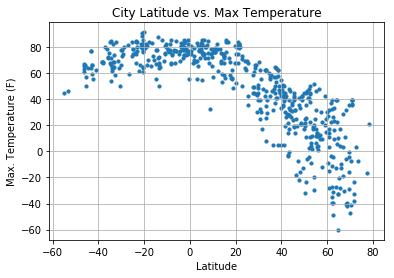

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

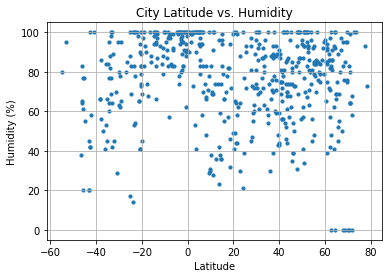

In [7]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

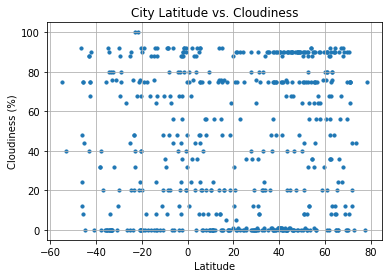

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

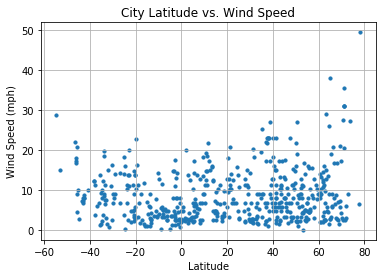

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()